## 선형회귀분석을 통해 w,b를 구하시오

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('electric.csv')
df

,Unnamed: 0,전기생산량,전기사용량
0,0,3.52,2.48
1,1,2.58,2.27
2,2,3.31,2.47
3,3,4.07,2.77
4,4,4.62,2.98
5,5,3.98,3.05
6,6,4.29,3.18
7,7,4.83,3.46
8,8,3.71,3.03
9,9,4.61,3.25


In [3]:
# 텐서 객체가 노드이므로 'x = df['전기생산량']'이라고 만들면 안됨, 이건 pandas 객체

x = tf.placeholder(tf.float32)
y = tf.constant(df['전기사용량'], tf.float32)

In [4]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [5]:
y

<tf.Tensor 'Const:0' shape=(12,) dtype=float32>

In [6]:
# w와 b에 초기값을 부여하는 과정

w = tf.Variable( tf.random_uniform([1]))
b = tf.Variable( tf.random_uniform([1]))

In [7]:
# 가설 설정

hx = w*x + b

# 비용함수 설정
cost = tf.reduce_mean(tf.square(hx-y))

In [8]:
# 미분

# 러닝메이트(0.001)는 테스트를 통해 조절
optimizer = tf.train.GradientDescentOptimizer(0.001) # argument로 learning mate를 투입
train = optimizer.minimize( cost )

In [9]:
# init은 랜덤하게 w와 b에 값을 투입시키는 기능

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
# 학습 시작

for i in range(10000) :
    sess.run(train, {x:df['전기생산량']} ) 
    if i%100==0:
        print(i, sess.run(cost, {x:df['전기생산량']} ) )

0 0.0495164
100 0.029359644
200 0.029294124
300 0.029253736
400 0.029213794
500 0.029174209
600 0.029135043
700 0.029096246
800 0.029057825
900 0.029019749
1000 0.028982116
1100 0.028944777
1200 0.028907841
1300 0.028871253
1400 0.028835041
1500 0.028799161
1600 0.028763644
1700 0.028728442
1800 0.02869361
1900 0.0286591
2000 0.028624974
2100 0.028591117
2200 0.028557613
2300 0.028524468
2400 0.02849158
2500 0.02845905
2600 0.028426826
2700 0.028394932
2800 0.028363338
2900 0.028332053
3000 0.02830107
3100 0.028270379
3200 0.028240016
3300 0.028209904
3400 0.028180122
3500 0.028150633
3600 0.028121427
3700 0.02809248
3800 0.028063813
3900 0.028035445
4000 0.028007353
4100 0.027979525
4200 0.02795194
4300 0.027924674
4400 0.027897686
4500 0.027870925
4600 0.027844422
4700 0.027818197
4800 0.027792186
4900 0.027766488
5000 0.027741008
5100 0.02771578
5200 0.02769079
5300 0.027666075
5400 0.027641535
5500 0.027617298
5600 0.027593248
5700 0.027569482
5800 0.027545907
5900 0.027522571
6000

In [11]:
# 트레이닝 결과

sess.run(w)

array([0.55770993], dtype=float32)

In [16]:
# 트레이닝 결과

sess.run(b)

array([0.67225164], dtype=float32)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51204 missing from c

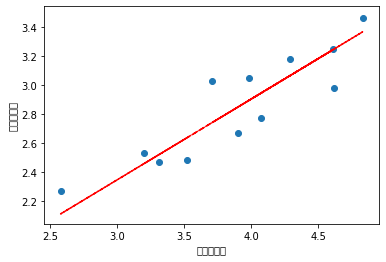

In [23]:
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.scatter(df['전기생산량'], df['전기사용량'])
plt.plot(df['전기생산량'], sess.run(hx,{x:df['전기생산량']} ), 'r--')
plt.show()

## 전기생산량이 40일 때 전기 상용량을 예측하시오

In [18]:
# 전기생산량이 40일때 전기사용량 예측

sess.run(hx, {x:[40]})

array([22.980648], dtype=float32)